In [9]:
import pandas as pd
df = pd.read_csv("C:/Users/kavya/Desktop/infyintern/archive/data.csv")
df.head()

date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
4  2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.8            26.8       0.0          N       N  
2             38.2            26.5       0.0          N       N  
3             21.4            25.2       4.2          N       N  
4             22.0            30.7       0.0          N       N

## Columns of Dataset:
##### RRP: Regional Reference Price in AUD.
##### demand_pos_RRP: Electricity demand at positive RRP in megawatt-hours (MWh).
##### RRP_positive: Positive Regional Reference Price in dollars.
##### demand_neg_RRP: Electricity demand at negative RRP in megawatt-hours (MWh).
##### RRP_negative: Negative Regional Reference Price in dollars.
##### frac_at_neg_RRP: Fraction of time at negative RRP (unitless).
##### min_temperature: Minimum daily temperature in degrees Celsius (°C).
##### max_temperature: Maximum daily temperature in degrees Celsius (°C).
##### solar_exposure: Daily solar exposure in megajoules per square meter (MJ/m²).
##### rainfall: Daily rainfall in millimeters (mm).
##### school_day: Indicates whether it is a school day (Yes/No).
##### holiday: Indicates whether it is a holiday (Yes/No).

#### The head of the dataset(top 5 rows).

In [7]:
print(df.columns) 

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


#### column names of the DataFrame as an Index object.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


#### This dataset contains 2,106 rows and 14 columns. These are all the rows that are there in the dataset.

In [11]:
df.dtypes

date                object
demand             float64
RRP                float64
demand_pos_RRP     float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
frac_at_neg_RRP    float64
min_temperature    float64
max_temperature    float64
solar_exposure     float64
rainfall           float64
school_day          object
holiday             object
dtype: object

#### data types of each column

In [13]:
print("Duplicate Rows:", df.duplicated().sum())  
df.drop_duplicates(inplace=True)  

Duplicate Rows: 0


In [15]:
# Fill missing numerical values with median
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Fill categorical missing values with mode
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

# Verify missing values are handled
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64


#### after filling the missing values

In [17]:
print(df.describe())  # Summary statistics

              demand          RRP  demand_pos_RRP  RRP_positive  \
count    2106.000000  2106.000000     2106.000000   2106.000000   
mean   120035.476503    76.079554   119252.305055     76.553847   
std     13747.993761   130.246805    14818.631319    130.114184   
min     85094.375000    -6.076028    41988.240000     13.568986   
25%    109963.650000    38.707040   109246.250000     39.117361   
50%    119585.912500    66.596738   119148.082500     66.869058   
75%    130436.006250    95.075012   130119.477500     95.130181   
max    170653.840000  4549.645105   170653.840000   4549.645105   

       demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
count     2106.000000   2106.000000      2106.000000      2106.000000   
mean       783.171448     -2.686052         0.008547        11.582289   
std       3578.920686     19.485432         0.039963         4.313711   
min          0.000000   -342.220000         0.000000         0.600000   
25%          0.000000      0.00

#### The basic statistics of the data.

In [21]:
df[['date', 'demand', 'RRP', 'min_temperature', 'max_temperature']].head(10)

date      demand        RRP  min_temperature  max_temperature
0  2015-01-01   99635.030  25.633696             13.3             26.9
1  2015-01-02  129606.010  33.138988             15.4             38.8
2  2015-01-03  142300.540  34.564855             20.0             38.2
3  2015-01-04  104330.715  25.005560             16.3             21.4
4  2015-01-05  118132.200  26.724176             15.0             22.0
5  2015-01-06  130672.485  31.282311             17.7             26.0
6  2015-01-07  153514.820  48.312309             18.9             37.4
7  2015-01-08  142015.655  49.117280             23.1             28.2
8  2015-01-09  121801.155  34.490675             16.5             18.0
9  2015-01-10  103043.660  20.229825             13.6             21.7

In [23]:
df['date'].value_counts()

date
2015-01-01    1
2018-11-15    1
2018-11-13    1
2018-11-12    1
2018-11-11    1
             ..
2016-11-28    1
2016-11-27    1
2016-11-26    1
2016-11-25    1
2020-10-06    1
Name: count, Length: 2106, dtype: int64

#### patterns over time (daily,weekly,monthly) and forecasting models need date as we have to predict the future values,contains 2106 unique dates.

In [25]:
df['demand'].value_counts()

demand
99635.030     1
108628.340    1
120185.265    1
114159.595    1
94602.890     1
             ..
118666.370    1
102718.900    1
104700.055    1
116011.565    1
122607.560    1
Name: count, Length: 2106, dtype: int64

#### unique demand value
#### Total electricity used that day

In [27]:
df['RRP'].value_counts()

RRP
25.633696     1
96.501966     1
111.573365    1
105.451832    1
76.672204     1
             ..
65.392779     1
37.003945     1
23.790583     1
27.616491     1
75.771059     1
Name: count, Length: 2106, dtype: int64

### higher demand higher rrp 
#### lower demand lower rrp

In [29]:
df[df['RRP'] < 0].shape[0] 

3

In [126]:
df[df['RRP'] < 0][['RRP', 'RRP_positive']]

RRP  RRP_positive
1848 -1.761423     30.024494
2101 -6.076028     26.980251
2102 -1.983471     32.438156

#### 2015-01-01	25.63
#### 2015-01-02	96.50
#### how much electricity costs per unit
#### each day has a different RRP based on demand, solar power availability, and other factors.

In [31]:
df['demand_pos_RRP'].value_counts()

demand_pos_RRP
97319.240     1
108628.340    1
120185.265    1
114159.595    1
94602.890     1
             ..
118666.370    1
102718.900    1
104700.055    1
116011.565    1
122607.560    1
Name: count, Length: 2106, dtype: int64

#### Demand when the price was positive.

In [33]:
(df['demand'] == df['demand_pos_RRP']).all()

False

#### Demand and demand postive were differnt becoz negative on some days, those days might have been removed 

In [35]:
df['RRP_positive'].value_counts()	

RRP_positive
26.415953     1
96.501966     1
111.573365    1
105.451832    1
76.672204     1
             ..
65.392779     1
37.003945     1
23.790583     1
27.616491     1
75.771059     1
Name: count, Length: 2106, dtype: int64

#### The price when it was above zero 

In [37]:
df['demand_neg_RRP'].value_counts()

demand_neg_RRP
0.000       1915
2315.790       1
1818.770       1
1812.000       1
3343.510       1
            ... 
2513.275       1
2547.750       1
1707.455       1
2123.920       1
7022.655       1
Name: count, Length: 192, dtype: int64

#### Demand when the price was negative

In [39]:
df[df['RRP_negative'] < 0]['RRP_negative'].value_counts()

RRP_negative
-0.010000      3
-0.230000      2
-20.717997     1
-16.849841     1
-5.825547      1
              ..
-5.880000      1
-49.630000     1
-342.220000    1
-157.920000    1
-6.511550      1
Name: count, Length: 178, dtype: int64

#### The price when it was below zero
#### If RRP is positive, RRP_negative is 0.
#### If RRP is negative, RRP_negative keeps the negative value.

In [41]:
df.shape 

(2106, 14)

In [43]:
positive_rrp_count = (df['RRP_negative'] == 0).sum()  # Count of positive/zero RRP values
negative_rrp_count = (df['RRP_negative'] < 0).sum()  # Count of negative RRP values
total_count = positive_rrp_count + negative_rrp_count

print("Total rows in dataset:", df.shape[0])
print("Positive RRP rows:", positive_rrp_count)
print("Negative RRP rows:", negative_rrp_count)
print("Sum of both:", total_count)


Total rows in dataset: 2106
Positive RRP rows: 1925
Negative RRP rows: 181
Sum of both: 2106


In [45]:
df['frac_at_neg_RRP'].value_counts()

frac_at_neg_RRP
0.000000    1915
0.020833      62
0.041667      27
0.083333      21
0.062500      16
0.125000      13
0.104167      11
0.229167       7
0.208333       6
0.166667       5
0.145833       5
0.187500       4
0.270833       3
0.250000       2
0.291667       2
0.354167       2
0.437500       1
0.625000       1
0.333333       1
0.312500       1
0.583333       1
Name: count, dtype: int64

#### 0.020833 (62 times) → In these 62 cases, about 2.08% of the time, RRP was negative.
#### 0.125000 (13 times) → 12.5% of the time, RRP was negative.
#### 0.625000 (1 time) → 62.5% of the time, RRP was negative (very high!).
#### These could be anomalies or seasonal effects.

In [47]:
df['min_temperature'].value_counts()

min_temperature
13.0    28
11.9    27
9.6     27
9.4     25
10.2    25
        ..
22.4     1
0.6      1
25.9     1
1.8      1
1.7      1
Name: count, Length: 211, dtype: int64

#### The most frequent minimum temperature values are 13.0°C (28 times), 11.9°C (27 times), 9.6°C (27 times),etc.
#### many days with moderate to cool temperatures.

In [49]:
df['max_temperature'].value_counts()

max_temperature
15.3    25
18.1    25
15.1    22
14.8    22
15.0    21
        ..
40.0     1
40.3     1
31.8     1
35.2     1
10.3     1
Name: count, Length: 283, dtype: int64

#### Some temperatures appear many times (e.g., 15.3°C and 18.1°C appeared 25 times each).
#### Some temperatures are rare (e.g., 40.3°C, 10.3°C appeared only once), meaning extreme heat

In [51]:
df['solar_exposure'].value_counts()	

solar_exposure
8.5     25
8.0     25
7.3     24
7.8     22
9.3     22
        ..
1.9      1
21.5     1
15.4     1
1.5      1
4.0      1
Name: count, Length: 316, dtype: int64

#### When there’s more sunlight, there is more solar power available, and electricity prices go down.
#### 8.5 25 → The solar exposure was 8.5 MJ/m² on 25 different days in the dataset
#### If solar exposure is high (e.g., 21.5), there’s a lot of sunlight, and demand for electricity might decrease (due to solar power usage).
#### If solar exposure is low (e.g., 1.9), less sunlight means higher electricity demand (people need more power for heating, lighting, etc.).

In [53]:
df['rainfall'].value_counts()

rainfall
0.0     1285
0.2      142
0.4       73
0.6       48
0.8       43
        ... 
10.0       1
24.8       1
43.8       1
25.2       1
11.8       1
Name: count, Length: 105, dtype: int64

#### Total rain recorded that day.
#### 0.0 mm → 1,282 days → These days had no rain at all (dry days).
#### 0.2 mm → 142 days → 142 days had light rain (0.2 mm of rainfall).
#### 0.4 mm → 73 days → 73 days had 0.4 mm of rain.
#### 10.0 mm → 1 day → Only one day had exactly 10 mm of rain.
#### 43.8 mm → 1 day → Only one day had 43.8 mm of heavy rain.

In [57]:
df['holiday'].value_counts()	

holiday
N    2029
Y      77
Name: count, dtype: int64

#### Whether it was a public holiday
#### On weekends/holidays, more people may stay home, increasing electricity usage in residential areas.

In [59]:
print(df['date'].isnull().sum())
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert safely
df.set_index('date', inplace=True)
print(df.index)  # Check if it's properly set
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)


0
DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30',
               '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06'],
              dtype='datetime64[ns]', name='date', length=2106, freq=None)


## Exploratory Data Analysis

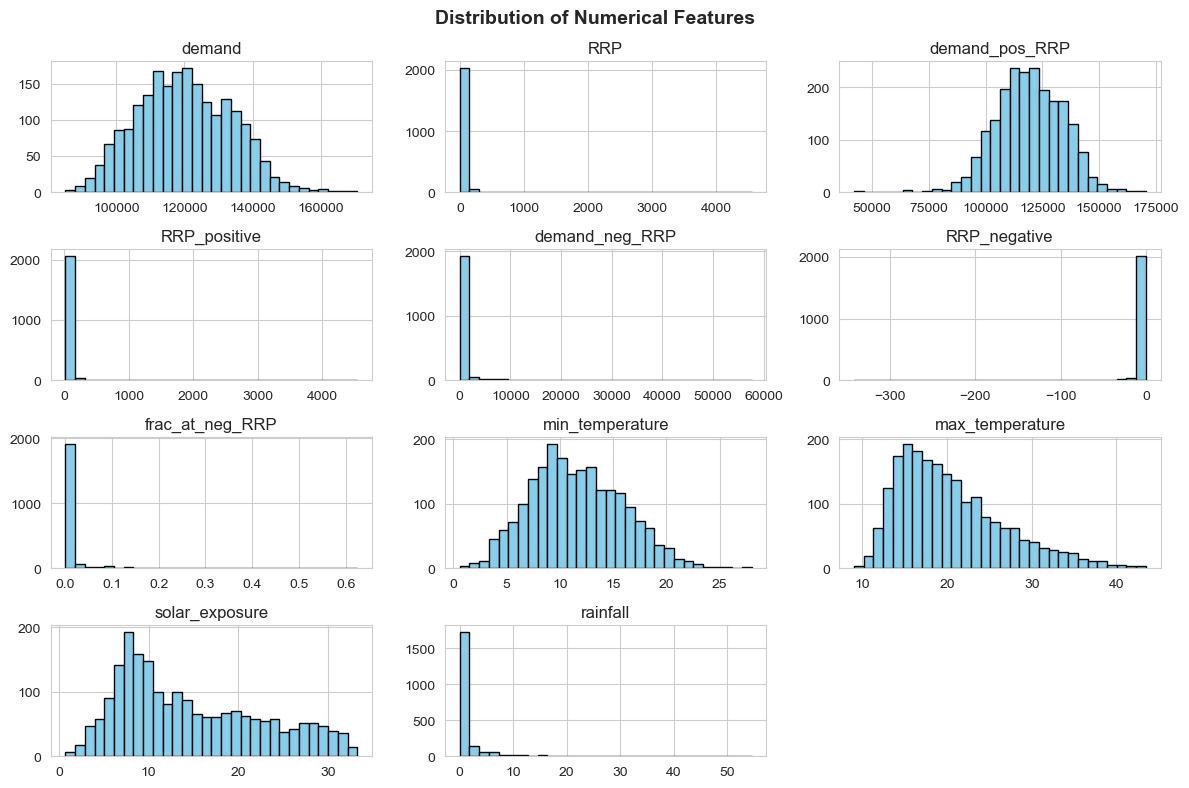

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Plot histograms with improved aesthetics
df.select_dtypes(include=['number']).hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')

# Improve spacing
plt.suptitle("Distribution of Numerical Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


#### We plotted histograms to see how electricity demand, price, and weather factors are distributed. This helps us understand patterns, detect outliers, and decide how to handle the data before forecasting.

C:\Users\kavya\AppData\Local\Temp\ipykernel_12692\1151990653.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette="Blues")


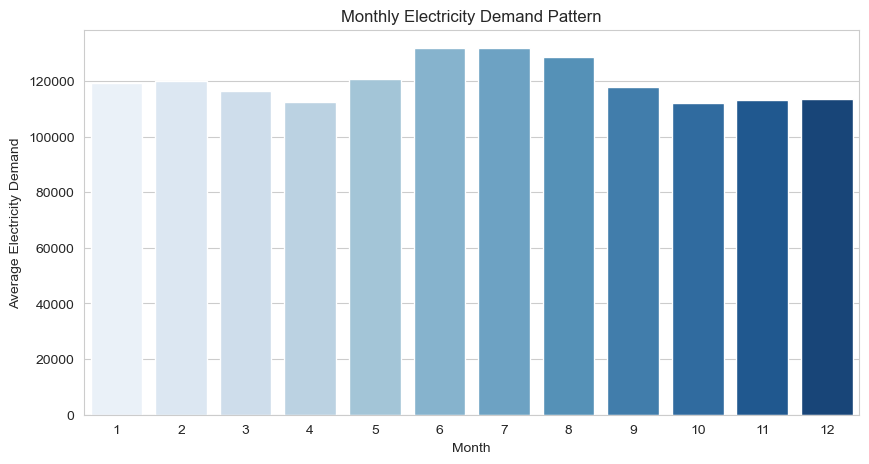

In [63]:


df['month'] = df.index.month  # Extract month from datetime index

# Group by month and calculate the average demand
monthly_trend = df.groupby('month')['demand'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Average Electricity Demand")
plt.title("Monthly Electricity Demand Pattern")
plt.show()


#### demand is higher in june,july.

In [64]:

# Group by year and month, then find the average demand per month
monthly_demand_per_year = df.groupby([df.index.year, df.index.month])['demand'].mean()

# Find the month with the highest demand for each year
highest_demand_per_year = monthly_demand_per_year.groupby(level=0).idxmax()

# Convert to readable format
highest_demand_per_year = highest_demand_per_year.apply(lambda x: f"Year {x[0]} - Month {x[1]}")

# Print the result
print(highest_demand_per_year)


date
2015    Year 2015 - Month 7
2016    Year 2016 - Month 6
2017    Year 2017 - Month 6
2018    Year 2018 - Month 6
2019    Year 2019 - Month 6
2020    Year 2020 - Month 7
Name: demand, dtype: object


C:\Users\kavya\AppData\Local\Temp\ipykernel_4292\608055247.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




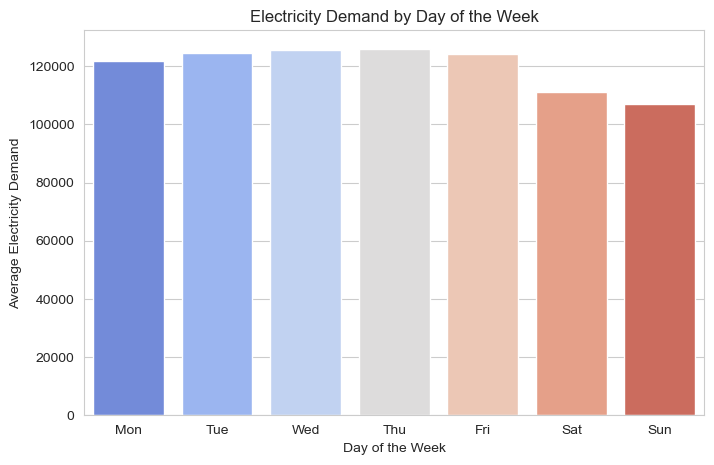

In [174]:
df['day_of_week'] = df.index.dayofweek  # Monday = 0, Sunday = 6

# Group by day and calculate the average demand
weekly_trend = df.groupby('day_of_week')['demand'].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y=weekly_trend.values, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Average Electricity Demand")
plt.title("Electricity Demand by Day of the Week")
plt.show()


#### demand is higher on weekdays

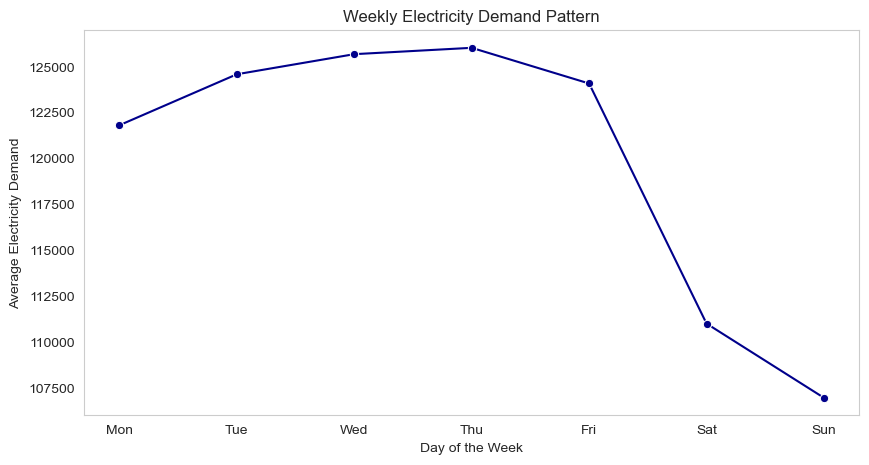

In [70]:

df['day_of_week'] = df.index.dayofweek  # Monday = 0, Sunday = 6

# Group by day of the week
weekly_trend = df.groupby('day_of_week')['demand'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_trend.index, y=weekly_trend.values, marker="o", color="darkblue")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Day of the Week")
plt.ylabel("Average Electricity Demand")
plt.title("Weekly Electricity Demand Pattern")
plt.grid()
plt.show()



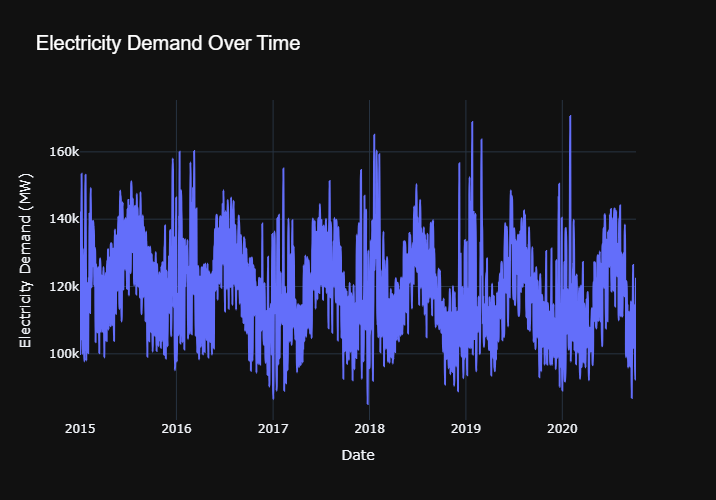

In [72]:
import plotly.express as px

# Ensure date is in datetime format
if 'date' not in df.columns:
    df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])

# Create an interactive line plot
fig = px.line(df, 
              x='date', 
              y='demand', 
              title='Electricity Demand Over Time', 
              labels={'demand': 'Electricity Demand (MW)', 'date': 'Date'},
              line_shape='spline',  # Smooth curves instead of jagged lines
              template='plotly_dark')  # Dark theme for a modern look

# Improve layout
fig.update_layout(
    title_font=dict(size=20, family="Arial", color="white"),
    xaxis_title="Date",
    yaxis_title="Electricity Demand (MW)",
    hovermode="x unified",
    width=1000,
    height=500
)

# Show figure
fig.show()


#### Electricity Demand Over Time:

#### 1.Electricity demand fluctuates over time with seasonal variations.

#### 2.Some periods show sharp increases or drops, possibly due to weather or special events.

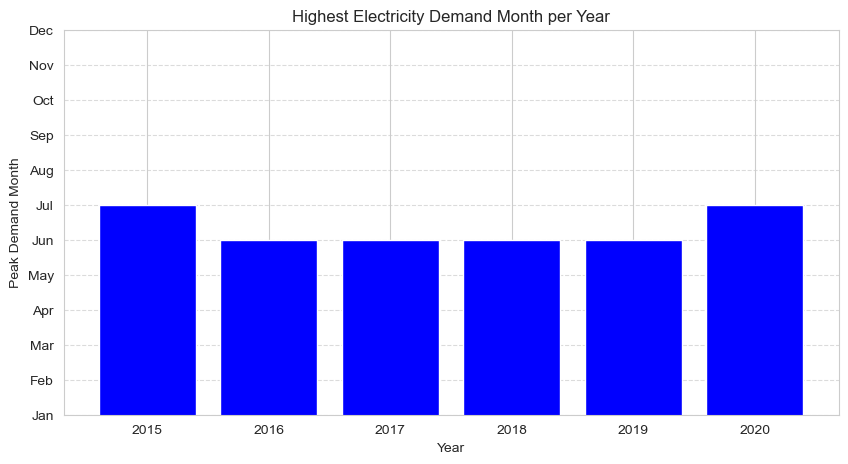

In [178]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path =("C:/Users/kavya/Desktop/infyintern/archive/data.csv")
df = pd.read_csv(file_path)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index
df.set_index('date', inplace=True)

# Group by year and month, then calculate the average demand per month
monthly_demand = df.groupby([df.index.year, df.index.month])['demand'].mean()

# Find the month with the highest demand for each year
highest_demand_per_year = monthly_demand.groupby(level=0).idxmax()

# Extract years and months for plotting
years = highest_demand_per_year.index.tolist()
months = [month[1] for month in highest_demand_per_year.values]  # Extract only the month

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(years, months, color="blue")
plt.xlabel("Year")
plt.ylabel("Peak Demand Month")
plt.title("Highest Electricity Demand Month per Year")
plt.xticks(years)  # Ensure correct x-axis labels
plt.yticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.ylim(1, 12)  # Ensure correct range for months
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



####  month with the highest electricity demand for each year
 #### JULY-2015
 #### JUNE-2016
 #### JUNE-2017
 #### JUNE-2018
 #### JUNE-2019
 #### JULY 2020
 

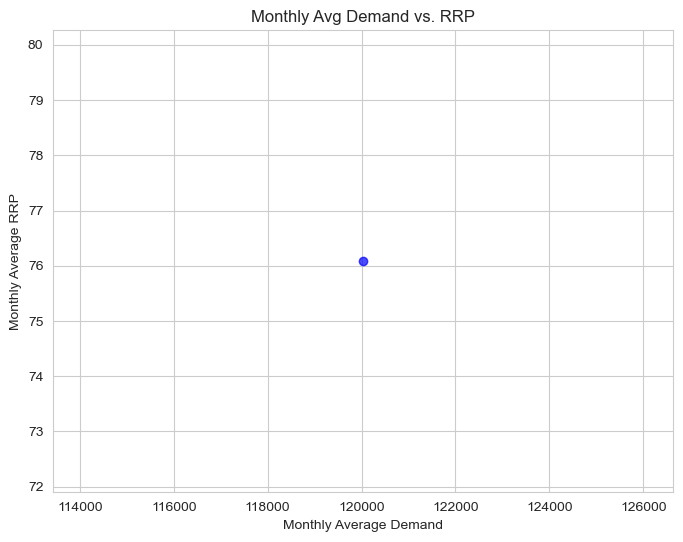

In [74]:
# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Select only numeric columns before resampling
df_numeric = df.select_dtypes(include=['number'])

# Resample data to monthly frequency and calculate mean
df_monthly = df_numeric.resample('ME').mean()

# Scatter plot: Monthly Avg Demand vs. RRP
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_monthly['demand'], df_monthly['RRP'], alpha=0.7, color='b')
plt.xlabel('Monthly Average Demand')
plt.ylabel('Monthly Average RRP')
plt.title('Monthly Avg Demand vs. RRP')
plt.grid(True)
plt.show()



#### demand alone does not determine price—other factors like fuel costs, weather, or market regulations might be influencing prices.

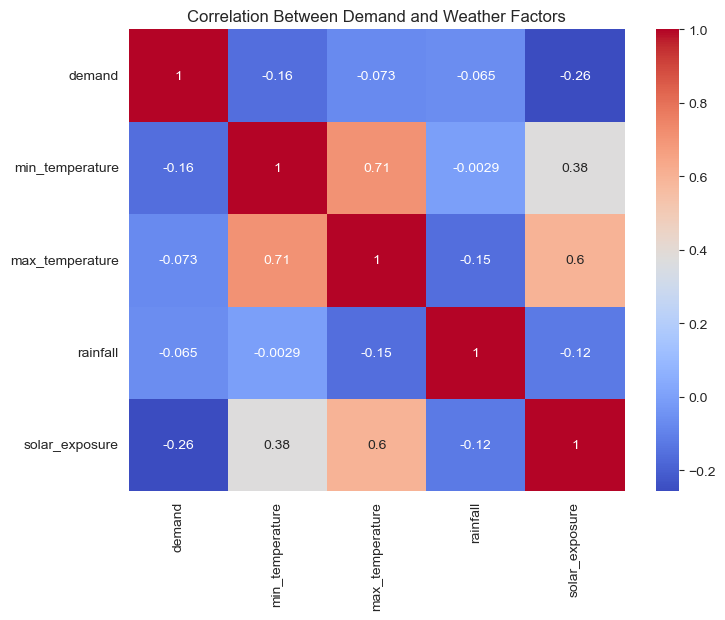

In [76]:

# Correlation heatmap with correct column names
plt.figure(figsize=(8, 6))
sns.heatmap(df[['demand', 'min_temperature', 'max_temperature', 'rainfall', 'solar_exposure']].corr(), 
            annot=True, cmap='coolwarm')

plt.title('Correlation Between Demand and Weather Factors')
plt.show()


#### Correlation Heatmap: Weather vs Demand & Price:

#### 1.Lower temperatures lead to higher electricity demand.

#### 2.Solar exposure negatively correlates with demand, suggesting reliance on solar power reduces grid electricity usage.

#### 3.Rainfall has minimal impact on demand and price.

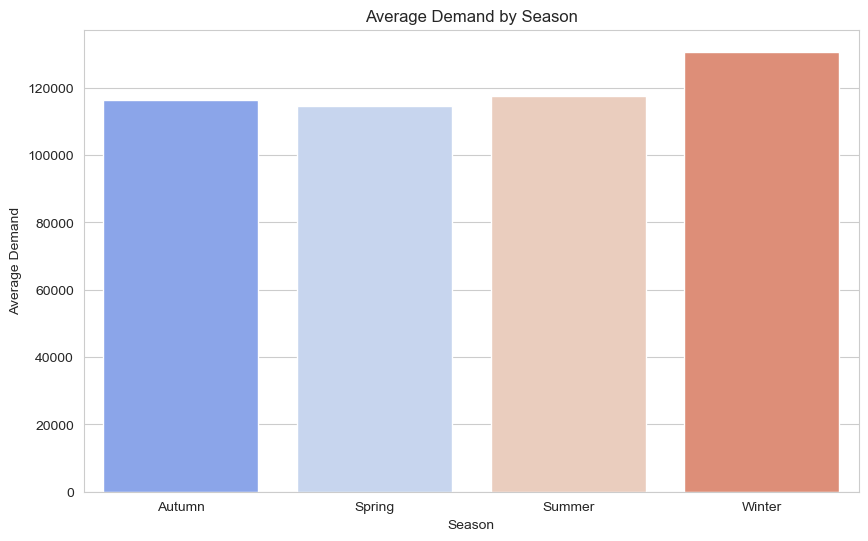

In [195]:
# Ensure 'date' column is in datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
# Define function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Add season column if 'date' exists
df['Month'] = df.index.month  # Extract month from date
if 'Month' in df.columns:
    df['Season'] = df['Month'].apply(get_season)

# Compute average demand per season
seasonal_demand = df.groupby('Season')['demand'].mean().reset_index()

# Plot seasonal demand
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='demand', data=seasonal_demand, palette='coolwarm', hue='Season', dodge=False)
plt.title('Average Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Demand')
plt.legend([], [], frameon=False)
plt.show()

#### which season is having higher demand - winter

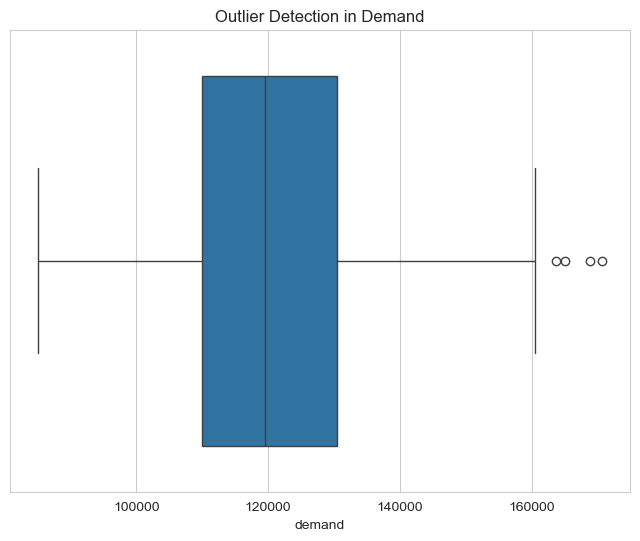

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['demand'])
plt.title('Outlier Detection in Demand')
plt.show()

#### outlier detection

Unique values in school_day: ['N' 'Y']
Unique values in holiday: ['Y' 'N']


C:\Users\kavya\AppData\Local\Temp\ipykernel_12692\503026008.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




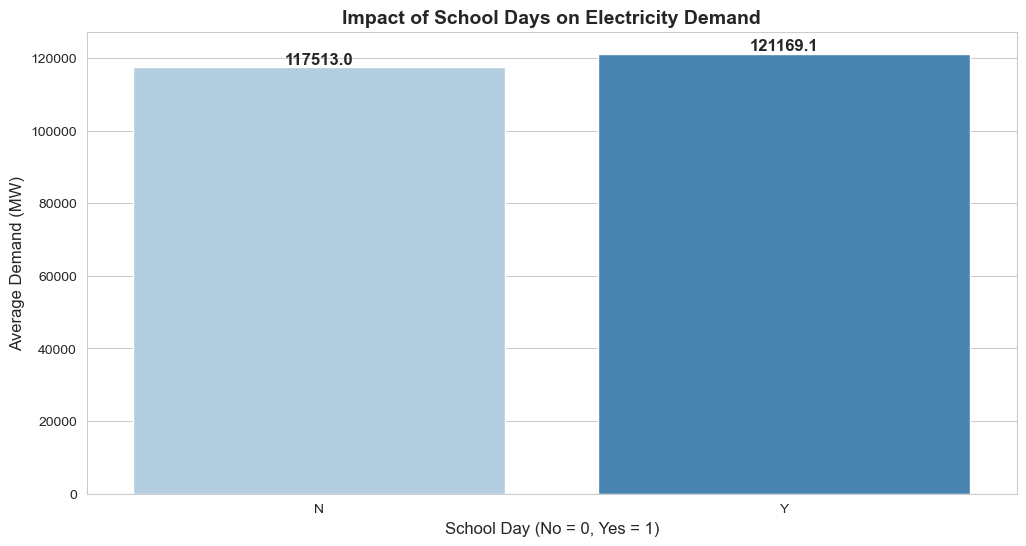

C:\Users\kavya\AppData\Local\Temp\ipykernel_12692\503026008.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




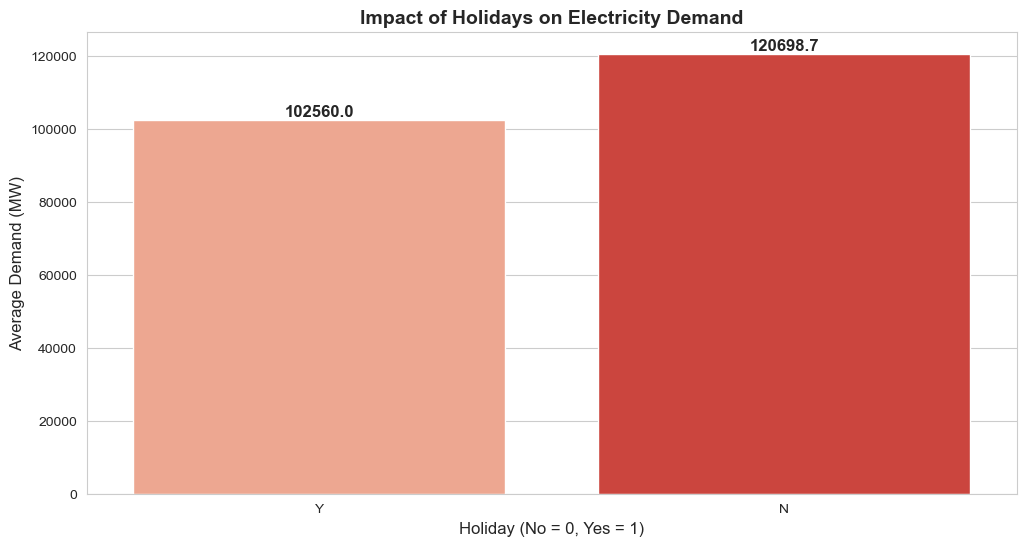

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to strings
df['school_day'] = df['school_day'].astype(str)
df['holiday'] = df['holiday'].astype(str)

# Handle missing values if needed
df = df.dropna(subset=['school_day', 'holiday', 'demand'])

# Check if both categories exist
print("Unique values in school_day:", df['school_day'].unique())
print("Unique values in holiday:", df['holiday'].unique())

# Function to annotate bars
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

# --- Impact of School Days on Demand ---
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='school_day', y='demand', data=df, palette='Blues', errorbar=None)
annotate_bars(ax1)
plt.title('Impact of School Days on Electricity Demand', fontsize=14, fontweight='bold')
plt.xlabel('School Day (No = 0, Yes = 1)', fontsize=12)
plt.ylabel('Average Demand (MW)', fontsize=12)
plt.show()

# --- Impact of Holidays on Demand ---
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='holiday', y='demand', data=df, palette='Reds', errorbar=None)
annotate_bars(ax2)
plt.title('Impact of Holidays on Electricity Demand', fontsize=14, fontweight='bold')
plt.xlabel('Holiday (No = 0, Yes = 1)', fontsize=12)
plt.ylabel('Average Demand (MW)', fontsize=12)
plt.show()


C:\Users\kavya\AppData\Local\Temp\ipykernel_4292\1045401069.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\kavya\AppData\Local\Temp\ipykernel_4292\1045401069.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




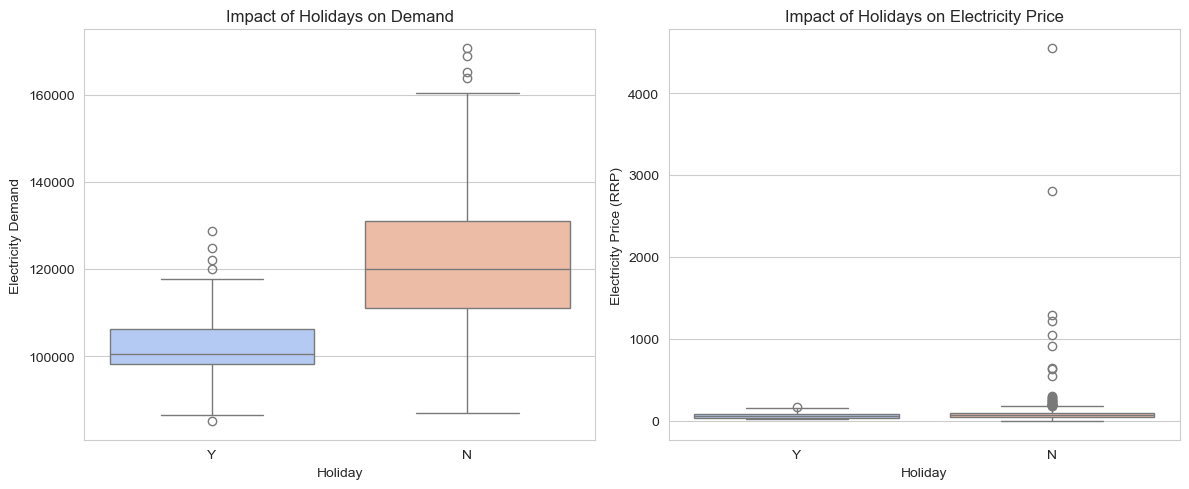

C:\Users\kavya\AppData\Local\Temp\ipykernel_4292\1045401069.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\kavya\AppData\Local\Temp\ipykernel_4292\1045401069.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




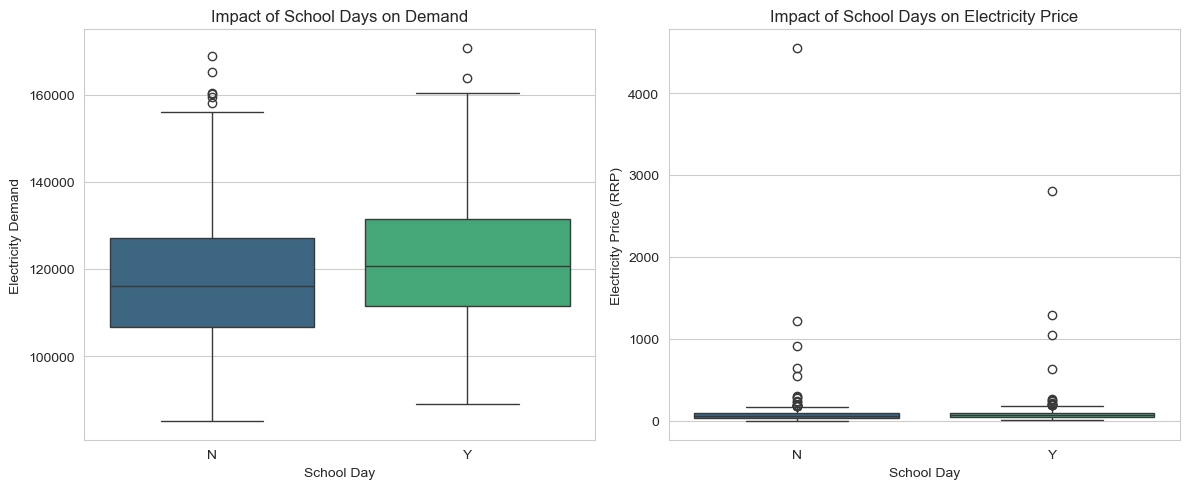

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'holiday' and 'school_day' to categorical types if they are not already
df['holiday'] = df['holiday'].astype(str)  # Ensure it's a string for grouping
df['school_day'] = df['school_day'].astype(str)

# Plot the impact of holidays on demand
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['holiday'], y=df['demand'], palette='coolwarm')
plt.xlabel("Holiday")
plt.ylabel("Electricity Demand")
plt.title("Impact of Holidays on Demand")

# Plot the impact of holidays on RRP (Price)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['holiday'], y=df['RRP'], palette='coolwarm')
plt.xlabel("Holiday")
plt.ylabel("Electricity Price (RRP)")
plt.title("Impact of Holidays on Electricity Price")

plt.tight_layout()
plt.show()

# Plot the impact of school days on demand
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['school_day'], y=df['demand'], palette='viridis')
plt.xlabel("School Day")
plt.ylabel("Electricity Demand")
plt.title("Impact of School Days on Demand")

# Plot the impact of school days on RRP (Price)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['school_day'], y=df['RRP'], palette='viridis')
plt.xlabel("School Day")
plt.ylabel("Electricity Price (RRP)")
plt.title("Impact of School Days on Electricity Price")

plt.tight_layout()
plt.show()


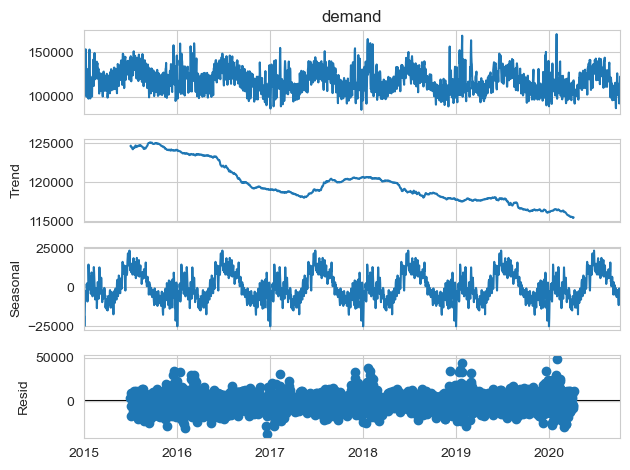

In [207]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['demand'], model='additive', period=365)  # Assuming daily data
result.plot()
plt.show()

#### 1.The original demand data.
#### 2.trends- as it is decreasing,this suggests that electricity demand is gradually reducing over time. 
#### 3.shows a clear repeating pattern, meaning electricity demand fluctuates with the seasons. This is likely due to temperature changes, as heating and cooling needs vary throughout the year.
#### 4.Residuals help in forecasting by showing unpredictable variations.

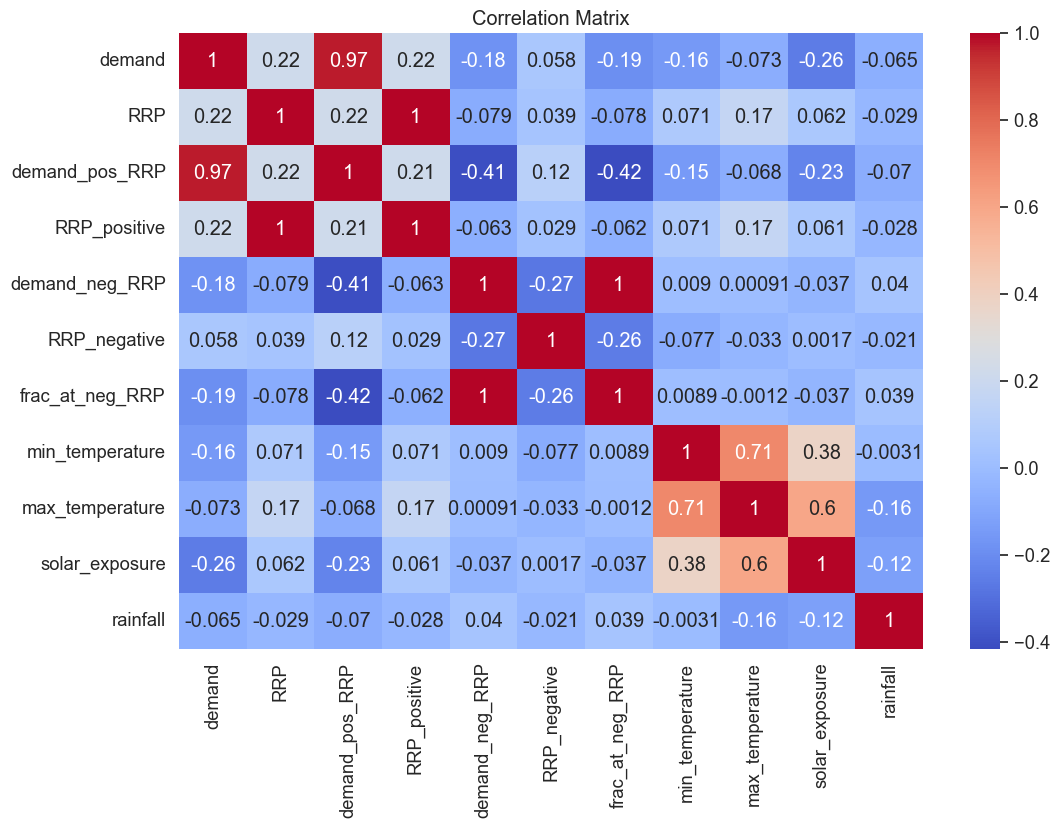

In [233]:
correlation_matrix = df[['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative',
                           'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### correlation matrix of all the attributes

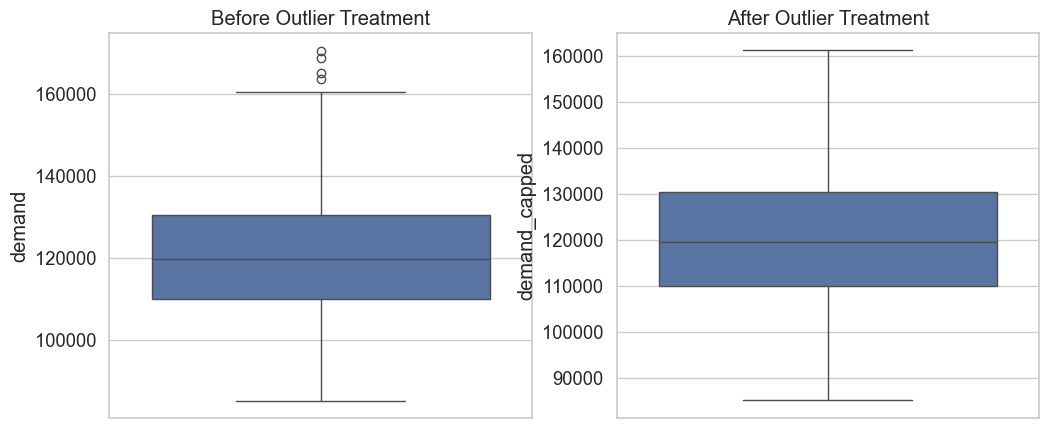

Number of outliers before capping: 4
Number of outliers after capping: 0


In [243]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Detect Outliers using IQR
q1 = df['demand'].quantile(0.25)
q3 = df['demand'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count the number of outliers before capping
outliers_before = df[(df['demand'] < lower_bound) | (df['demand'] > upper_bound)]

# Apply capping (Winsorization)
df['demand_capped'] = np.where(df['demand'] > upper_bound, upper_bound,
                               np.where(df['demand'] < lower_bound, lower_bound, df['demand']))

# Count the number of outliers after capping
outliers_after = df[(df['demand_capped'] < lower_bound) | (df['demand_capped'] > upper_bound)]

# Visualization: Boxplots Before and After Capping
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['demand'])
plt.title('Before Outlier Treatment')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['demand_capped'])
plt.title('After Outlier Treatment')

plt.show()

# Print outlier counts
print(f"Number of outliers before capping: {len(outliers_before)}")
print(f"Number of outliers after capping: {len(outliers_after)}")


#### As we can see that there are few outliers in the electricity demand. By using the IQR method we can handle the outliers. The left boxplot shows outliers before treatment, while the right boxplot confirms they are reoved after capping.

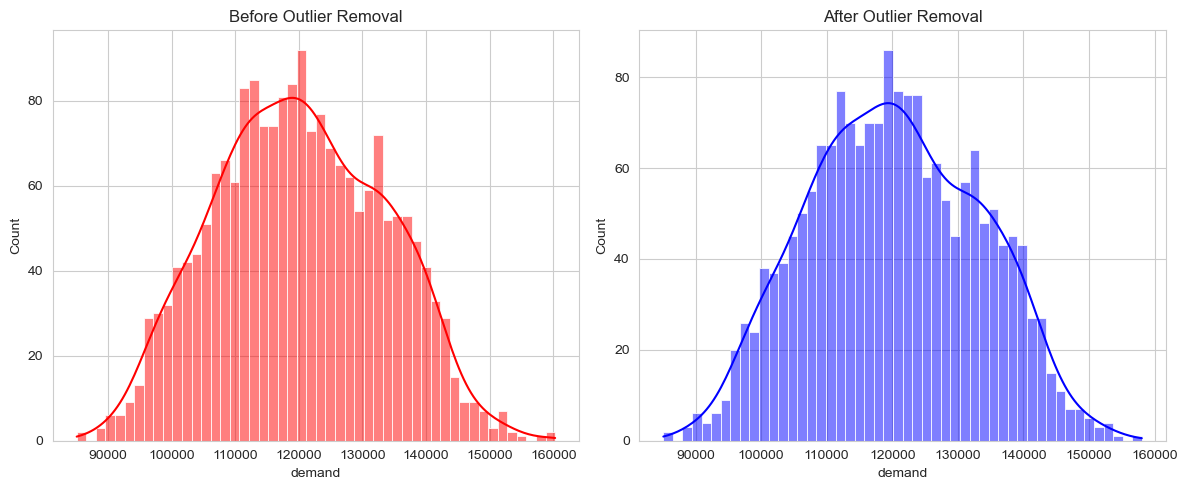

Removed 129 extreme outliers


In [88]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Define threshold
z_thresh = 3

# Find outliers
numerical_cols = df.select_dtypes(include=['number']).columns
z_scores = stats.zscore(df[numerical_cols])
outliers = (abs(z_scores) > z_thresh).sum()

# Plot before outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['demand'], bins=50, kde=True, color='red')
plt.title("Before Outlier Removal")

# Remove outliers
df_clean = df[(abs(z_scores) < z_thresh).all(axis=1)]

# Plot after outlier removal
plt.subplot(1, 2, 2)
sns.histplot(df_clean['demand'], bins=50, kde=True, color='blue')
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

print(f"Removed {len(df) - len(df_clean)} extreme outliers")
df = df_clean  # Update dataset


#### demand variations after and before outliers

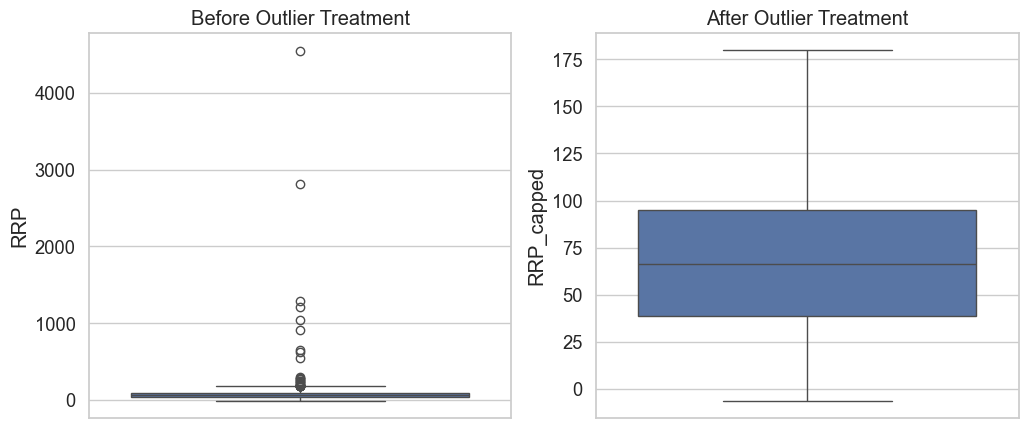

Number of outliers before capping: 28
Number of outliers after capping: 0


In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Detect Outliers using IQR
q1 = df['RRP'].quantile(0.25)
q3 = df['RRP'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count outliers before capping
outliers_before = df[(df['RRP'] < lower_bound) | (df['RRP'] > upper_bound)]

# Apply capping (Winsorization)
df['RRP_capped'] = np.where(df['RRP'] > upper_bound, upper_bound,
                            np.where(df['RRP'] < lower_bound, lower_bound, df['RRP']))

# Count outliers after capping
outliers_after = df[(df['RRP_capped'] < lower_bound) | (df['RRP_capped'] > upper_bound)]

# Visualization: Boxplots Before and After Capping
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['RRP'])
plt.title('Before Outlier Treatment')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['RRP_capped'])
plt.title('After Outlier Treatment')

plt.show()

# Print outlier counts
print(f"Number of outliers before capping: {len(outliers_before)}")
print(f"Number of outliers after capping: {len(outliers_after)}")


#### before outliers treatment and after outliers treatment

Negative Price Periods: 3
Low Price Periods (below 27.60): 211


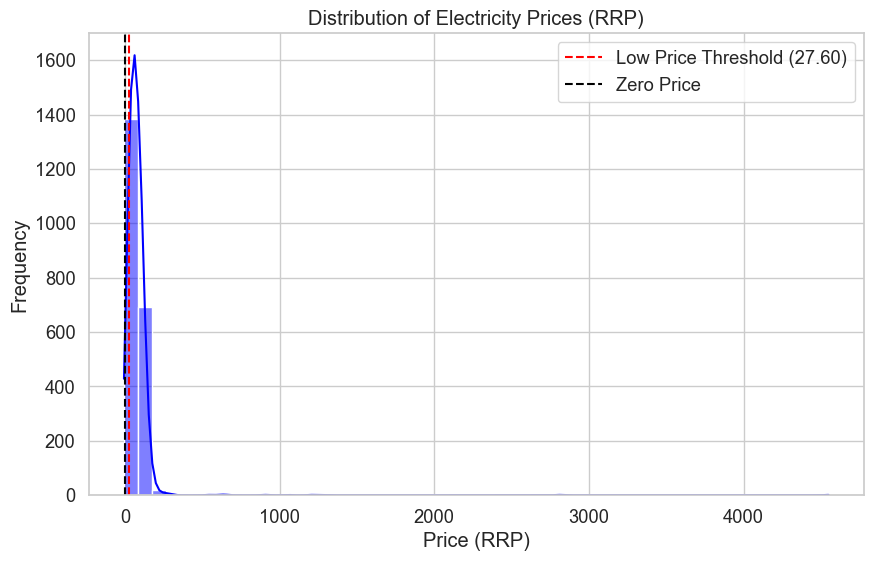

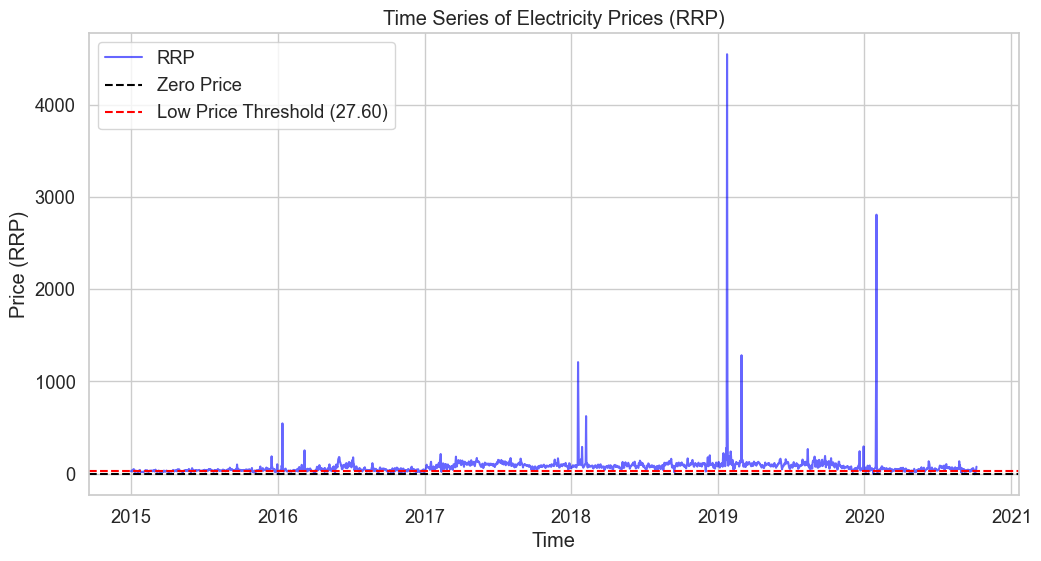

C:\Users\kavya\AppData\Local\Temp\ipykernel_4292\780037392.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




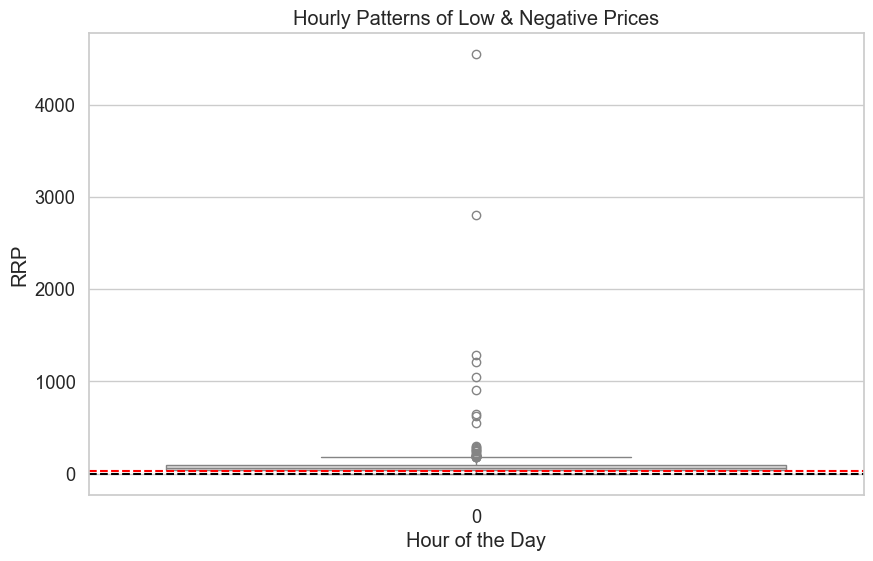

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a low price threshold (10th percentile)
low_price_threshold = df['RRP'].quantile(0.10)

# Filter for low and negative price periods
df['price_category'] = np.where(df['RRP'] < 0, 'Negative',
                               np.where(df['RRP'] < low_price_threshold, 'Low', 'Normal'))

# Count occurrences
price_counts = df['price_category'].value_counts()

# Print summary
print(f"Negative Price Periods: {sum(df['RRP'] < 0)}")
print(f"Low Price Periods (below {low_price_threshold:.2f}): {sum(df['RRP'] < low_price_threshold)}")

# --- 1️⃣ Histogram of Prices ---
plt.figure(figsize=(10, 6))
sns.histplot(df['RRP'], bins=50, kde=True, color='blue')
plt.axvline(low_price_threshold, color='red', linestyle='dashed', label=f'Low Price Threshold ({low_price_threshold:.2f})')
plt.axvline(0, color='black', linestyle='dashed', label='Zero Price')
plt.title("Distribution of Electricity Prices (RRP)")
plt.xlabel("Price (RRP)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --- 2️⃣ Time Series Plot of RRP ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='RRP', color='blue', alpha=0.6, label="RRP")
plt.axhline(0, color='black', linestyle='dashed', label="Zero Price")
plt.axhline(low_price_threshold, color='red', linestyle='dashed', label=f'Low Price Threshold ({low_price_threshold:.2f})')
plt.title("Time Series of Electricity Prices (RRP)")
plt.xlabel("Time")
plt.ylabel("Price (RRP)")
plt.legend()
plt.show()

# --- 3️⃣ Low/Negative Price by Hour of Day ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.index.hour, y=df['RRP'], palette="coolwarm")
plt.axhline(0, color='black', linestyle='dashed')
plt.axhline(low_price_threshold, color='red', linestyle='dashed')
plt.title("Hourly Patterns of Low & Negative Prices")
plt.xlabel("Hour of the Day")
plt.ylabel("RRP")
plt.show()



#### A).Distribution of RRP(Electricity Price) to Identify Negative/Low Prices:

#### 1.Prices fluctuate significantly, with some negative values.

#### 2.Negative RRP suggests excess supply, where providers may pay consumers to take electricity.

## Conclusion: Exploratory Data Analysis (EDA) on Electricity Demand and Price
#### Data Overview & Cleaning
#### The dataset was cleaned by handling missing values and ensuring data types were correctly assigned.
#### Time Series Analysis & Seasonality
#### Electricity prices also fluctuate, but sharp price spikes were observed during certain months.


## Final Insights
#### ✅ Understanding demand patterns can help optimize electricity generation and supply strategies.
#### ✅ Recognizing seasonal fluctuations allows for better load forecasting and energy pricing.
#### ✅ Identifying and mitigating price anomalies can improve market stability and prevent unexpected financial losses.